# CS345 Final Project
## Mark Richards and Glen McIntosh

In [1]:
#test
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.api.types import is_numeric_dtype
import numpy as np
le = LabelEncoder()


data = pd.read_csv('dataset.csv', index_col=0)
for col in data.columns:
    if(not is_numeric_dtype(data[col])):
        data[col] = le.fit_transform(data[col])
X = data.loc[:, data.columns != 'popularity'].values

y = data['popularity'].values
X.shape, y.shape
print(X[1])
print(y[1])
size_test = 0.2
size_validation = 0.2
size_train = 0.6

from sklearn.model_selection import train_test_split

# first split into training / test, where the training set
# will be further split into training / validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=size_test, random_state=5)


[55668 3287 14796 22528 149610 False 0.42 0.166 1 -17.235 1 0.0763 0.924
 5.56e-06 0.101 0.267 77.489 4 0]
55


Random Forest

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error 
import math
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("Mean squared error: ", round(mse, 3))
print("Root mean squared error: ", round(rmse, 3))

Mean squared error:  578.169
Root mean squared error:  24.045


PCA Analysis

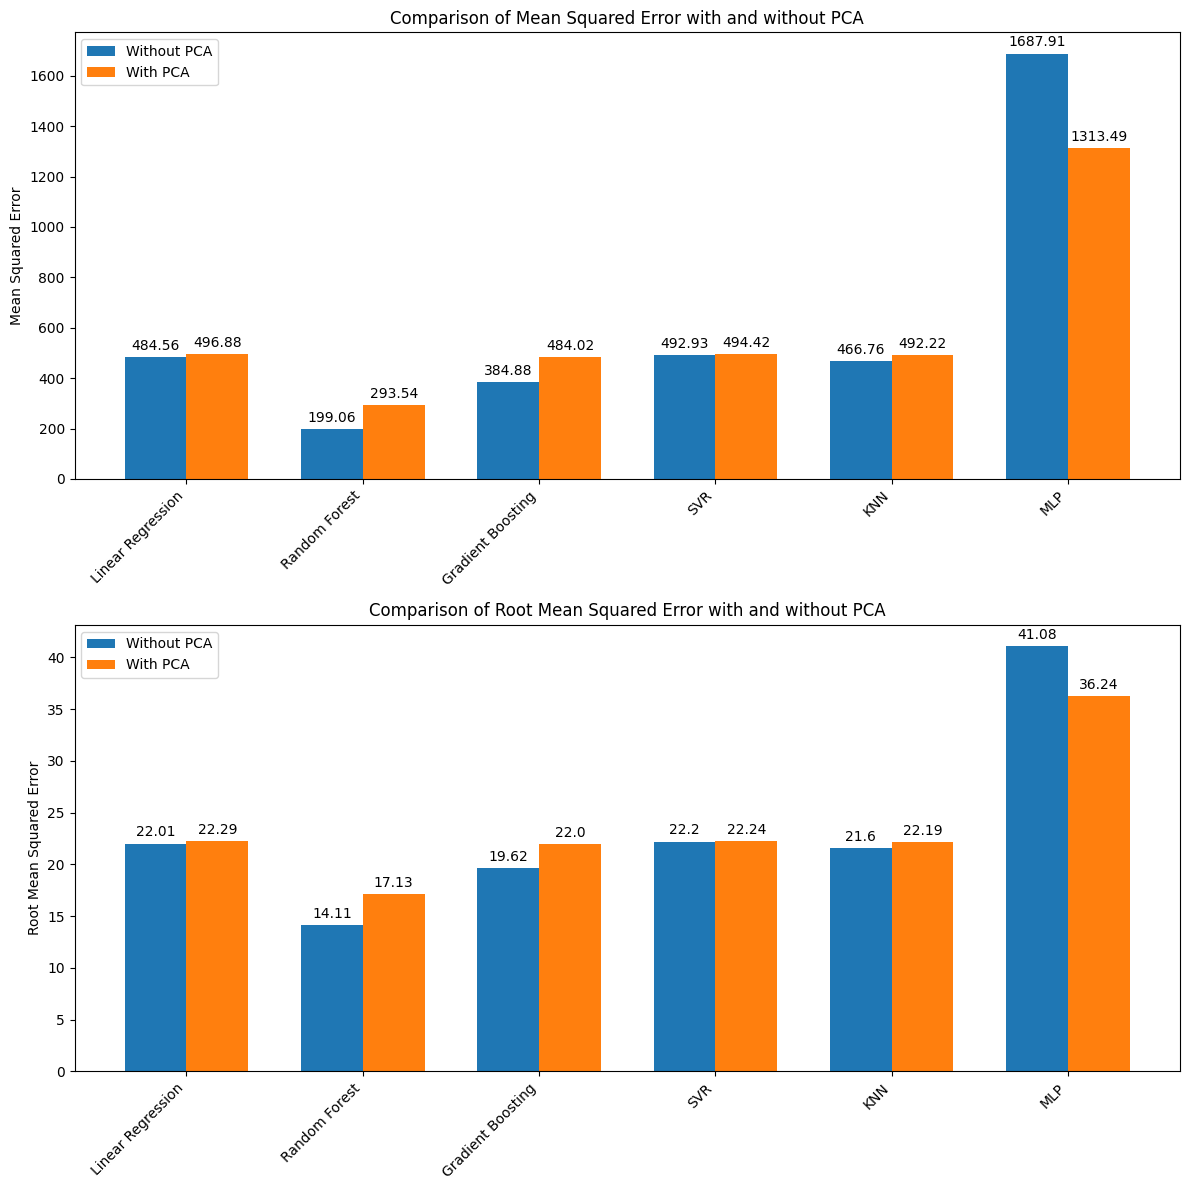

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import math

pca = PCA(n_components=3)

pca.fit(X_train)

principal_components = pca.components_

X_train_pca = pca.transform(X_train)

X_test_pca = pca.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP": MLPRegressor()
}

mse_pca = {}
rmse_pca = {}

mse_no_pca = {}
rmse_no_pca = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    mse_no_pca[name] = mse
    rmse_no_pca[name] = rmse

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    mse_pca[name] = mse
    rmse_pca[name] = rmse


mse_no_pca = [mse_no_pca[name] for name in models]  # Mean Squared Errors without PCA
rmse_no_pca = [rmse_no_pca[name] for name in models]  # Root Mean Squared Errors without PCA

mse_with_pca = [mse_pca[name] for name in models]  # Mean Squared Errors with PCA
rmse_with_pca = [rmse_pca[name] for name in models]  # Root Mean Squared Errors with PCA

x = np.arange(len(models))  
width = 0.35  

fig, ax = plt.subplots(2, figsize=(12, 12))

rects1 = ax[0].bar(x - width/2, mse_no_pca, width, label='Without PCA')
rects2 = ax[0].bar(x + width/2, mse_with_pca, width, label='With PCA')

ax[0].set_ylabel('Mean Squared Error')
ax[0].set_title('Comparison of Mean Squared Error with and without PCA')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models, rotation=45, ha="right")
ax[0].legend()

rects3 = ax[1].bar(x - width/2, rmse_no_pca, width, label='Without PCA')
rects4 = ax[1].bar(x + width/2, rmse_with_pca, width, label='With PCA')

ax[1].set_ylabel('Root Mean Squared Error')
ax[1].set_title('Comparison of Root Mean Squared Error with and without PCA')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models, rotation=45, ha="right")
ax[1].legend()

def add_labels(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1, ax[0])
add_labels(rects2, ax[0])
add_labels(rects3, ax[1])
add_labels(rects4, ax[1])

fig.tight_layout()

plt.show()

In this section we decided on several models that we thought would be ideal for our dataset. Since we had so many features we thought it would be applicable to do a PCA transform on the data. As an experiment we ran the models with our data before applying the transform and logged our Mean Squared Error and our Root Mean Squared Error on each, and then on the same models using the data after tha PCA transform. We have all the results above. One thing not shown in this notebook was the amount of PCA classifiers we used in a few other experiments. We tried a few different options starting with the default of 3. We included the one with the best resluts as the final product of this notebook which ended up being 3. We tried several other numbers were thought would make sense and they each made the results significantly worse. We were hoping that the PCA would make a positive difference in the MSE but it makes since considering the amount of features and how much the interoperability of the features differs from each other. While doing this analysis we also got a good overview of many different classifiers and which would be best to test how accurately we can predict a songs popularity. 

Correlation Matrix

In [ ]:
data.corr()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
track_id,1.000000,0.003145,0.007099,0.005522,0.003243,-0.002948,0.004163,-0.000227,-0.000496,-0.003049,0.001659,-0.006385,-0.000463,0.001339,-0.000122,-0.003250,0.001762,-0.008136,-0.003744,-0.003892
artists,0.003145,1.000000,0.090200,0.038962,0.003613,-0.021607,-0.004681,-0.009931,-0.005585,0.006627,-0.018849,-0.002994,-0.016232,-0.004201,0.016062,-0.007998,0.001034,0.001176,-0.008205,-0.008684
album_name,0.007099,0.090200,1.000000,0.303326,0.042476,0.006659,0.000366,-0.019172,-0.044734,-0.006879,-0.032245,-0.000470,-0.013400,0.033436,0.001293,-0.027725,-0.041685,-0.003281,-0.001222,0.003509
track_name,0.005522,0.038962,0.303326,1.000000,0.011911,0.004122,-0.005851,-0.020873,-0.039645,-0.003901,-0.012528,0.006074,-0.025669,0.035894,-0.024628,-0.005687,-0.016535,0.005590,-0.002533,0.001864
popularity,0.003243,0.003613,0.042476,0.011911,1.000000,-0.007101,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073,0.032692
duration_ms,-0.002948,-0.021607,0.006659,0.004122,-0.007101,1.000000,-0.065263,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225,-0.032826
explicit,0.004163,-0.004681,0.000366,-0.005851,0.044082,-0.065263,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816,0.038386,-0.054828
danceability,-0.000227,-0.009931,-0.019172,-0.020873,0.035448,-0.073426,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218,0.003569
energy,-0.000496,-0.005585,-0.044734,-0.039645,0.001056,0.058523,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126,-0.056175
key,-0.003049,0.006627,-0.006879,-0.003901,-0.003853,0.008114,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065,-0.005508


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import svm

from sklearn.model_selection import GridSearchCV

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=size_validation, random_state=5)

param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [0.001, 0.01, 0.1], 
   'kernel': ['rbf']},
 ]
classifier = GridSearchCV(svm.SVC(), param_grid)

classifier.fit(X_valid, y_valid);
classifier.best_estimator_

/home/glen/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


SVC(C=10, gamma=0.001)

In [2]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale_train = object.fit_transform(X_train)
classifier = svm.SVR(kernel = "rbf", C=10, gamma= 0.001)
classifier.fit(scale_train, y_train)

SVR(C=10, gamma=0.001)

In [3]:
from sklearn.metrics import mean_squared_error 
import math
X_test_scale = object.transform(X_test)
y_pred = classifier.predict(X_test_scale)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("Mean squared error: ", round(mse, 3))
print("Root mean squared error: ", round(rmse, 3))

Mean squared error:  483.845
Root mean squared error:  21.996


In [4]:
scale_train = object.fit_transform(X_train)
scale_train_no_id = scale_train[:,1:]
classifier = svm.SVR(kernel = "rbf", C=10, gamma= 0.001)
classifier.fit(scale_train_no_id, y_train)

SVR(C=10, gamma=0.001)

In [5]:
from sklearn.metrics import mean_squared_error 
import math
X_test_scale = object.transform(X_test)
X_test_no_id = X_test_scale[:,1:]
y_pred = classifier.predict(X_test_no_id)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("Mean squared error: ", round(mse, 3))
print("Root mean squared error: ", round(rmse, 3))

Mean squared error:  483.817
Root mean squared error:  21.996
